## Oppstart

### Preamble

Contains imports and some utility code.

In [1]:
from dhlab.module_update import update, css, code_toggle

In [2]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
import networkx as nx
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
css()

In [5]:
def frame_sort(frame, by=0):
    return frame.sort_values(by=by, ascending=False)

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Kollokasjoner eller assosiasjoner

Hvilke ord opptrer et ord sammen med innenfor et korpus? 

### Define a corpus

Bruk gjerne Dewey eller temaord for å definere korpuset, hold det forholdsvis lite rundt 200 bøker.

In [7]:
collword = 'kjønnet'

In [8]:
korpus = nb.book_urn(words=[collword], ddk='8%', period=(1960, 2020), limit=500)
len(korpus)

500


Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.



In [9]:
nb.frame(korpus).head(10)

,0,1,2,3
0,2015120306003,"Adler, Warren",Tilfeldighetenes spill,2000
1,2014081908221,"Briskin, Jacqueline",I skjebnens favn,1996
2,2013040308075,"Fiorato, Marina",Botticellis hemmelighet,2011
3,2011063006065,"Bergan, Hege Susanne",Jeg sier hele tiden ting som: kjærlighet,2008
4,2011032406112,"Wærenskjold, Leif",Bilder fra Guds have,1964
5,2007112701016,"Sunde, Ole Robert",Naturligvis måtte hun ringe,1992
6,2011020408157,"Holt, Victoria",En er min fiende,1997
7,2014080806110,"Deaver, Jeffery",Det knuste vinduet,2010
8,2011070405143,"Heivoll, Gaute",Omars siste dager,2004
9,2014042906164,"Walters, Minette",Kameleonens skygge,2009


In [10]:
nb.urn_concordance(word=collword, urns=korpus)

"Tilfeldighetenes spill, Adler, Warren, 2000",hans patetiske uvitenhet om hele,kjønnet,. Hvem er disse menneskene
"Tilfeldighetenes spill, Adler, Warren, 2000",hun kjente på det harde,kjønnet,"hans , den silkeglatte huden"
"I skjebnens favn, Briskin, Jacqueline, 1996",han tilføyd henne rispene på,kjønnet,med overlegg ? Han tvang
"Botticellis hemmelighet, Fiorato, Marina, 2011",Både hjertet og,kjønnet,mitt sitret av glede .
"Botticellis hemmelighet, Fiorato, Marina, 2011",faktisk hadde grepet tak i,kjønnet,hans den første gangen vi
"Jeg sier hele tiden ting som: kjærlighet, Bergan, Hege Susanne, 2008",", hva for noe ,",kjønnet,"ditt , begynner jeg å"
"Bilder fra Guds have, Wærenskjold, Leif, 1964",Seiv,kjønnet,kan skifte i mytologien og
"Naturligvis måtte hun ringe, Sunde, Ole Robert, 1992","om størrelsen , arten og",kjønnet,? ) men å sørge
"En er min fiende, Holt, Victoria, 1997",— Du er sikker på,kjønnet,. — Selvfølgelig er jeg
"Det knuste vinduet, Deaver, Jeffery, 2010",uniforme . For eksempel kan,kjønnet,ditt et sted bli angitt
"Omars siste dager, Heivoll, Gaute, 2004","magen et sted , og",kjønnet,"hennes , oldingkjønnet på bildet"


## Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

Så kan vi hente ut selve kollokasjonen,dvs. ord som står innenfor en viss avstand fra målordet.

In [11]:
small_window = 5
large_window = 10

In [12]:
def collpart(collword, urns, win = 5, limit = 10000):
    return nb.urn_coll(collword, urns = korpus, after = win, before = win, limit = 10000)

Kollokasjonen er en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [13]:
small = collpart(collword, nb.pure_urn(korpus), win = 5)
large = collpart(collword, nb.pure_urn(korpus), win = 10)



## Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(small)
nb.normalize_corpus_dataframe(large)

Inspiser dataene etter normalisering

### Kollokasjonen

In [14]:
small.head()

,0
",",746
.,606
og,444
det,338
hans,220


In [15]:
large.head()

,0
",",1395
.,1191
og,877
det,555
i,411


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [16]:
delta = pd.DataFrame()

In [17]:
delta['small'] = small[0]
delta['large'] = large[0]

In [18]:
delta['ratio'] = small[0]/large[0]

In [19]:
#delta['log'] = np.log(delta['ratio'])

In [20]:
#delta['score'] = delta['ratio'] * delta['log']

In [21]:
delta[(delta['small'] > 2) & (delta['ratio'] > 0.6)].sort_values(by='ratio', ascending=False)

,small,large,ratio
hensyn,3,3,1.000000
Deretter,3,3,1.000000
hårene,4,4,1.000000
makt,4,4,1.000000
stivt,7,7,1.000000
...,...,...,...
alle,11,18,0.611111
det,338,555,0.609009
begynte,17,28,0.607143
:,23,38,0.605263


In [22]:
delta.loc[[',','.','og','!', '?']]

,small,large,ratio
",",746,1395,0.534767
.,606,1191,0.508816
og,444,877,0.506271
!,8,30,0.266667
?,28,55,0.509091


In [23]:
delta_max = delta[delta.small < delta.large][delta.small > 0][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [24]:
delta_const = delta[delta.small > 2][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [25]:
delta_max.head(20)

,small,large,ratio
harde,42,45,0.933333
sitt,90,98,0.918367
mitt,76,85,0.894118
navlen,8,9,0.888889
tunge,7,8,0.875000
såtte,7,8,0.875000
omkring,6,7,0.857143
strøk,18,21,0.857143
mørke,6,7,0.857143
mannen,6,7,0.857143


In [26]:
delta_const

,small,large,ratio
hensyn,3,3,1.000000
Deretter,3,3,1.000000
hårene,4,4,1.000000
makt,4,4,1.000000
stivt,7,7,1.000000
...,...,...,...
alle,11,18,0.611111
det,338,555,0.609009
begynte,17,28,0.607143
:,23,38,0.605263


In [27]:
delta_max.head(50).index

Index(['harde', 'sitt', 'mitt', 'navlen', 'tunge', 'såtte', 'omkring', 'strøk',
       'mørke', 'mannen', 'svake', 'ditt', 'rørte', 'legge', 'rykket', 'siste',
       'svulmende', 'åpne', 'stive', 'resten', 'vidt', 'Kan', 'stivnet',
       'samlet', 'ett', 'fri', 'hjernen', 'Mot', 'blottlagt', 'røre',
       'pulserende', 'Etter', 'forhold', 'adskilt', 'vokste', 'sprekken',
       'trykket', 'reise', 'fuktige', 'frem', 'hennar', 'styrte', 'Du',
       'tungt', 'dette', 'slutt', 'bort', 'brant', 'nærmer', 'foldene'],
      dtype='object')

In [28]:
delta_const.head(50).index

Index(['hensyn', 'Deretter', 'hårene', 'makt', 'stivt', 'slappe', 'streifet',
       'vite', 'umulig', 'ny', 'slikke', 'presse', 'fremdeles', 'Auga',
       'faktisk', 'ellers', 'bruker', 'minst', 'konstant', 'skjule', 'pulsere',
       'videre', 'bankende', 'varsomt', 'føltes', 'dekket', 'kanten', 'vårt',
       'Marcia', 'døden', 'dunkende', 'bestemme', 'kjærtegne', 'nær',
       'performative', 'berørte', 'svulmet', 'maven', 'hvilte', 'væsken',
       'høres', 'åpner', 'halve', 'madrassen', 'glid', 'dunket', 'føre',
       'hennes.', 'Kunsten', 'henger'],
      dtype='object')

# Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

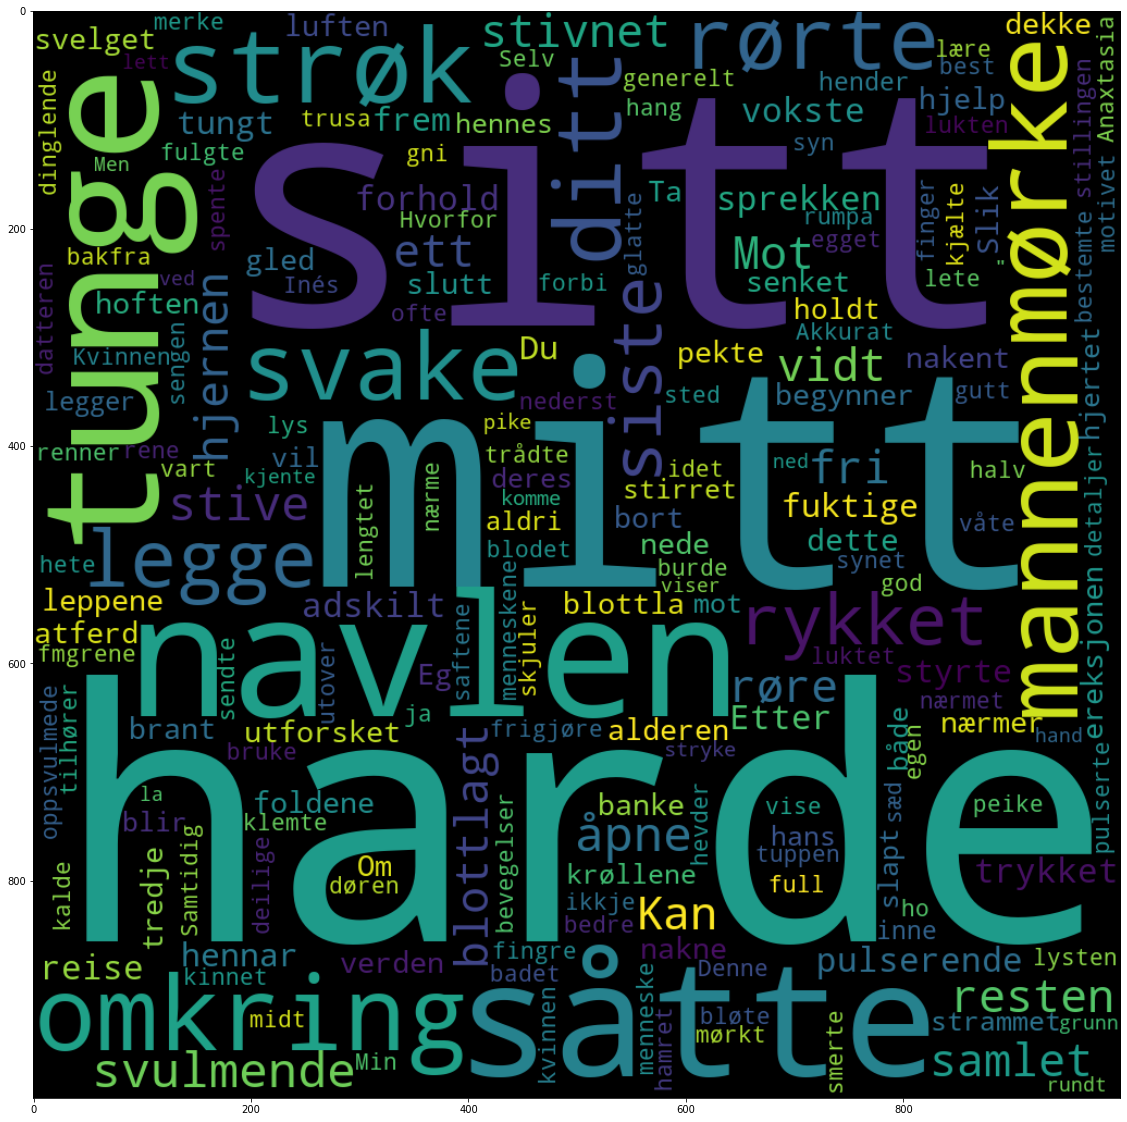

In [29]:
nb.cloud(nb.frame(delta_max.ratio))

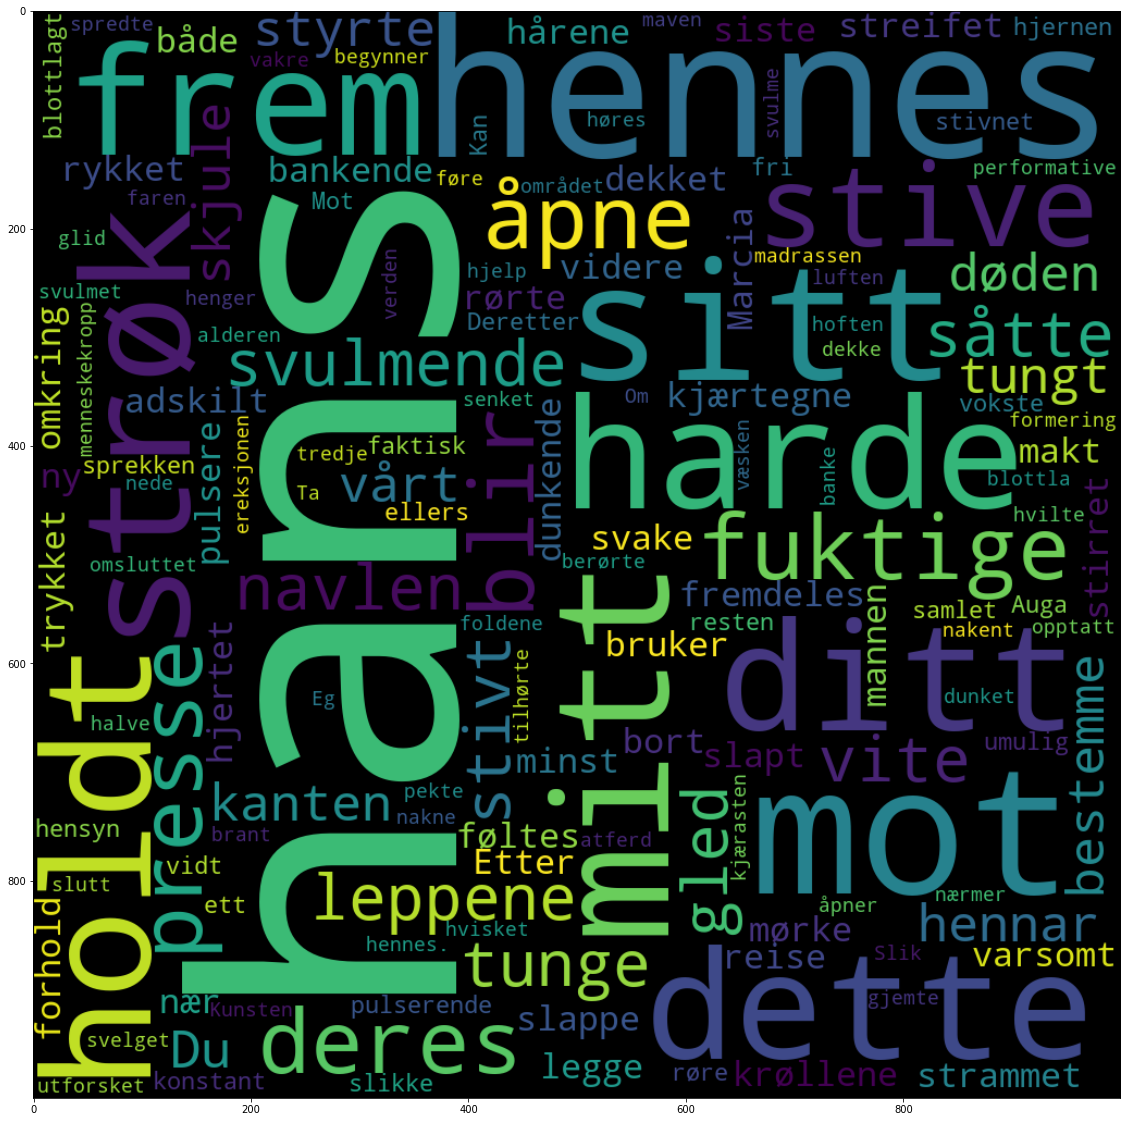

In [30]:
nb.cloud(nb.frame(delta_const.head(150).small/delta_const.small.sum()))